In [1]:
#Title;


#***Write a Problem Statement***

In [2]:

#The project aims to

#create a predictive model
#-the model takes values for select features of a vehicle,
#and predicts the one-year resale value

#***Source for Relevant Data***

In [3]:
#The data was obtained from Kaggle Website stored in a csv file

In [4]:

# import Statements

import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import pickle
from google.colab import files

import warnings
warnings.filterwarnings('ignore')


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Importing the relevant Dataset

df = pd.read_csv("/content/supermarket_sales - Sheet1.csv")

#***EXAMINING DATASET***

In [7]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [9]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  


#***Taking out irregularities***

In [12]:
#The entire Dataset with the total of 1000 rows and 17 columns has no null value

In [13]:

#Checking for null values
# The code returns true if the row is null  or balank or returns false

In [14]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [15]:
#There's no values missing in this case

 #***SUMMARY STATISTIC***

In [16]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [18]:
# Correlation
df[["Quantity", "gross income","Unit price","Total"]].corr()

,Quantity,gross income,Unit price,Total
Quantity,1.000000,0.705510,0.010778,0.705510
gross income,0.705510,1.000000,0.633962,1.000000
Unit price,0.010778,0.633962,1.000000,0.633962
Total,0.705510,1.000000,0.633962,1.000000


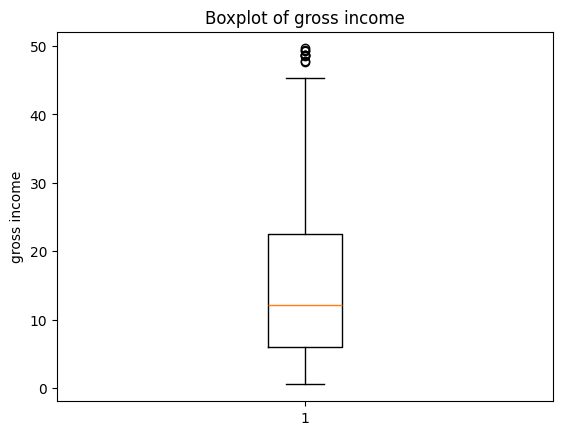

In [19]:
plt.boxplot(df["gross income"])
plt.title("Boxplot of gross income")
plt.ylabel("gross income")
plt.show()

#***Exploratory Data Analysis***

In [20]:
#Observing the "" column, since its the target vector of the dataset

# exploring the "gross income"

df["gross income"]


,gross income
0,26.1415
1,3.8200
2,16.2155
3,23.2880
4,30.2085
...,...
995,2.0175
996,48.6900
997,1.5920
998,3.2910


In [21]:
#Exploring total sales

df["Total"]

,Total
0,548.9715
1,80.2200
2,340.5255
3,489.0480
4,634.3785
...,...
995,42.3675
996,1022.4900
997,33.4320
998,69.1110



#***Summary Statistics***

In [22]:
df["gross income"].describe()

,gross income
count,1000.000000
mean,15.379369
std,11.708825
min,0.508500
25%,5.924875
50%,12.088000
75%,22.445250
max,49.650000


In [23]:
df["Total"].describe()

,Total
count,1000.000000
mean,322.966749
std,245.885335
min,10.678500
25%,124.422375
50%,253.848000
75%,471.350250
max,1042.650000


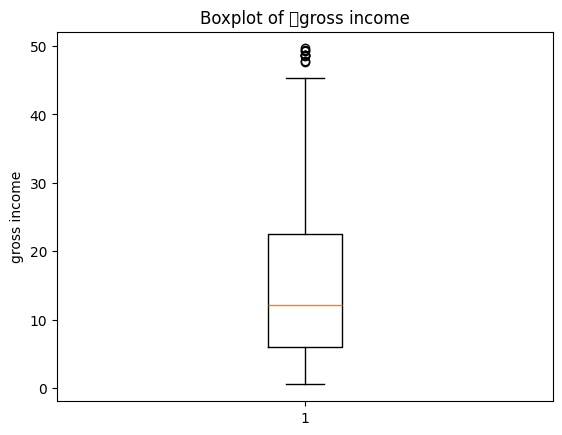

In [24]:
# box plot of the "gross income" column

plt.boxplot(df["gross income"])
plt.title("Boxplot of 	gross income")
plt.ylabel("gross income")
plt.show()

In [25]:
#Observing other columns to find the ones that fit as feature matrix columns.

#A correlation heatmap is used in this kind of situation.



In [26]:
# correlation heatmap of numerical columns in the dataset

df[["gross income", "Rating", "Quantity", "cogs"]].corr()

,gross income,Rating,Quantity,cogs
gross income,1.000000,-0.036442,0.705510,1.000000
Rating,-0.036442,1.000000,-0.015815,-0.036442
Quantity,0.705510,-0.015815,1.000000,0.705510
cogs,1.000000,-0.036442,0.705510,1.000000


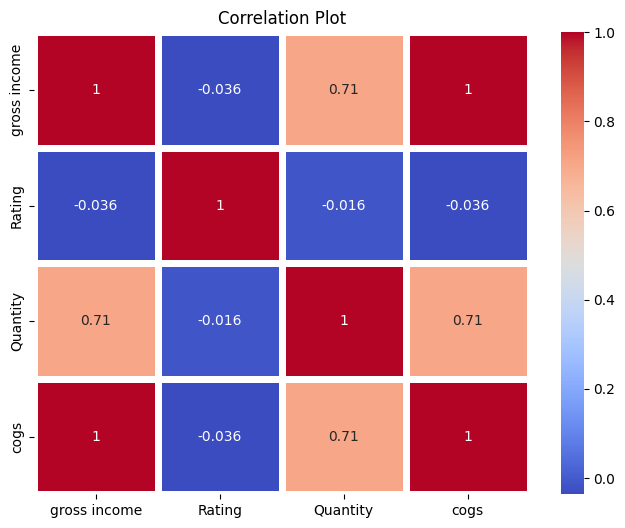

In [27]:
corr = df[["gross income", "Rating", "Quantity", "cogs"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=5)
plt.title("Correlation Plot")
plt.show()

#***Genral Boxplot***

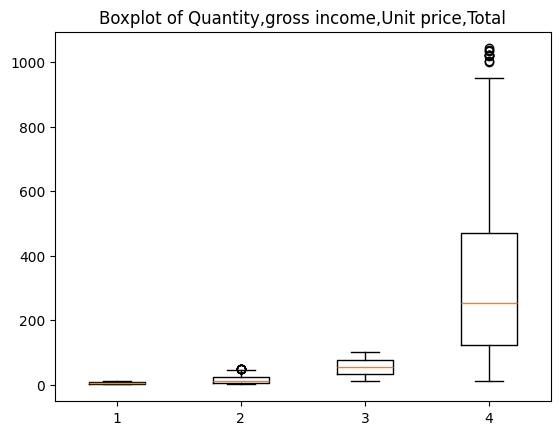

In [28]:
# box plot of "gross income and Total" columns

plt.boxplot(df[["Quantity", "gross income","Unit price","Total"]])
plt.title("Boxplot of Quantity,gross income,Unit price,Total")
# plt.ylabel("Gross Income")
plt.show()

#***Decide on Most Appropriate Machine Learning Model***


In [29]:

#A linear regression model

#***Train & Test Model***

In [30]:
# trimming the data to relevant columns

model_df = df[["gross income", "Total"]]
model_df

,gross income,Total
0,26.1415,548.9715
1,3.8200,80.2200
2,16.2155,340.5255
3,23.2880,489.0480
4,30.2085,634.3785
...,...,...
995,2.0175,42.3675
996,48.6900,1022.4900
997,1.5920,33.4320
998,3.2910,69.1110


In [31]:
# divide data into feature matrix and target vector

feature = ["gross income"]
target = "Total"

X = model_df[feature]
y = model_df[target]

In [32]:
# dividing data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create the predictive model

In [33]:
# creating linear regression model

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [34]:
# use the model


model.predict([[13]])[0]

273.0

Create Model and Evaluate Its Performance

In [35]:
#Baselining

In [36]:
# Let's create a baseline model

# baseline_model =

baseline_model = y_train.mean()

baseline_model

319.2399

In [37]:
# let's create predictions using the baseline model

# baseline_pred =

baseline_pred = [baseline_model] * len(y_test)

baseline_pred[0]

319.2399

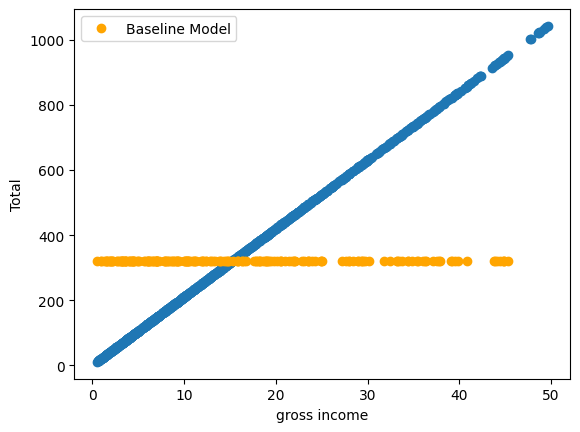

In [38]:
# visualising the baseline on a scatterplot

plt.plot(X_test.values, baseline_pred, "bo", color="orange", label="Baseline Model")
plt.scatter(X, y)
plt.xlabel("gross income")
plt.ylabel("Total")
plt.legend()

Evaluating Baseline Performance

In [39]:
# MAE for baseline model


baseline_mae = mean_absolute_error(y_test, baseline_pred)

print("The mean value of y_train values is:", round(baseline_model, 2))
print("The baseline MAE is:", round(baseline_mae, 2))

The mean value of y_train values is: 319.24
The baseline MAE is: 209.77



#***Build and Evaluate Model***


Linear Regression Model

In [40]:
# let's create a linear regression model

model = LinearRegression()
model

LinearRegression()

Model Fitting (Training)

In [41]:

model.fit(X_train, y_train)

LinearRegression()

In [42]:
# we'd generate predictions using X_train

model_train_pred = model.predict(X_train)

model_train_pred

array([ 235.2105,  122.5245,  458.6925, 1034.46  ,  202.335 ,  164.43  ,
        357.588 ,  217.2555,  637.728 ,  441.588 ,  166.635 ,  950.25  ,
         57.876 ,  130.032 ,   49.4235,  103.635 ,  207.48  ,  536.991 ,
        435.12  ,  131.208 ,  530.67  ,   56.406 ,  104.832 ,  867.615 ,
        446.439 ,  340.5255,   74.76  , 1042.65  ,  122.472 ,   77.658 ,
        140.6475,   63.9975,  344.4   ,  597.6285,  202.818 ,  737.7615,
         33.3585,  304.983 ,  829.71  ,   49.308 ,  489.048 ,   93.2925,
        429.1665,  455.1225,  295.6905,  860.685 ,  145.068 ,  189.0945,
        256.7775,   78.603 ,  161.7   ,  804.3   ,  432.9885,  317.835 ,
        258.678 ,  324.2925,  377.58  ,   44.9925,   26.733 ,  627.6165,
        176.4   ,  572.775 ,   78.435 ,  148.974 , 1002.12  ,   76.5765,
         97.419 ,  345.786 ,  246.6765,   55.881 ,   72.87  ,  115.08  ,
        423.738 ,  439.8975,  132.027 ,  172.746 ,   91.77  ,  343.413 ,
        304.542 ,  369.684 ,  226.065 ,  257.145 , 

Evaluate Model Perfomance I

In [43]:
 #Calculate model MAE for training data

model_train_mae = mean_absolute_error(y_train, model_train_pred)

round(model_train_mae, 3)

0.0

In [44]:
#Compare Baseline MAE with Model's training MAE

In [45]:
# print baseline and model (train) mae to compare both

print("The baseline MAE is:\t\t", round(baseline_mae, 2))
print("The model (train) MAE is:\t", round(model_train_mae, 2))

The baseline MAE is:		 209.77
The model (train) MAE is:	 0.0


Visualise Model (train data) on Scatterplot

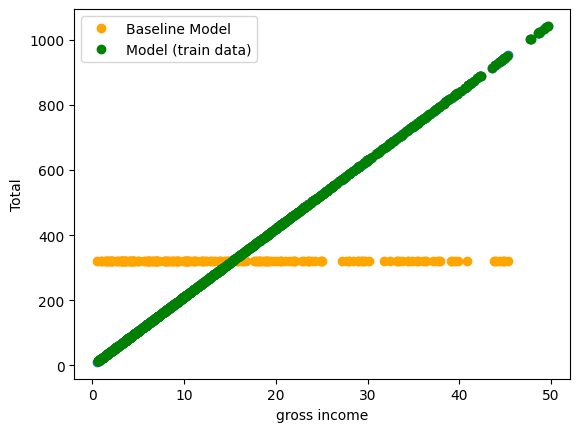

In [46]:
# visualising the baseline and model (train data) on a scatterplot

plt.plot(X_test.values, baseline_pred, "bo", color="orange", label="Baseline Model")
plt.plot(X_train.values, model_train_pred, "bo", color="green", label="Model (train data)")
plt.scatter(X, y)
plt.xlabel("gross income")
plt.ylabel("Total")
plt.legend()

Test Model With Testing Data

In [47]:
# model generates predictions off X_test values

model_test_pred = model.predict(X_test)

model_test_pred

array([523.971 , 616.98  , 408.7335, 135.3555,  45.927 , 618.975 ,
       127.827 , 731.6925, 450.1035, 138.1275, 422.73  , 463.428 ,
       212.7825, 252.252 , 290.0835, 331.128 , 587.664 , 216.846 ,
       757.365 , 185.094 , 416.178 , 166.236 , 128.016 , 125.706 ,
       247.8735, 195.594 , 742.2975,  30.996 , 145.5825,  56.469 ,
        75.5475, 609.    ,  96.1905, 432.768 , 193.011 , 174.3   ,
       667.38  , 198.639 , 193.074 , 192.843 , 214.746 , 922.635 ,
        74.7075, 180.873 ,  93.0405, 400.764 , 221.886 ,  68.2395,
       343.224 , 281.169 , 430.71  , 101.64  ,  69.09  , 269.934 ,
       181.44  , 494.1825, 461.5275,  60.816 , 456.288 , 222.138 ,
       121.128 ,  33.936 ,  84.756 , 942.4485, 381.3915, 510.615 ,
       370.125 , 760.452 , 939.54  , 118.251 , 391.419 , 127.26  ,
       293.139 ,  89.0715,  65.604 , 697.368 , 764.19  , 253.008 ,
        76.755 , 745.836 , 305.55  ,  70.287 , 352.5795, 614.943 ,
       218.0745, 270.585 ,  69.111 , 829.08  , 384.72  , 395.8

Evaluate Model Perfomance II

In [48]:
# Calculate model MAE for test data

model_test_mae = mean_absolute_error(y_test, model_test_pred)

round(model_test_mae, 3)

0.0

Visualise Model (test data) on Scatterplot

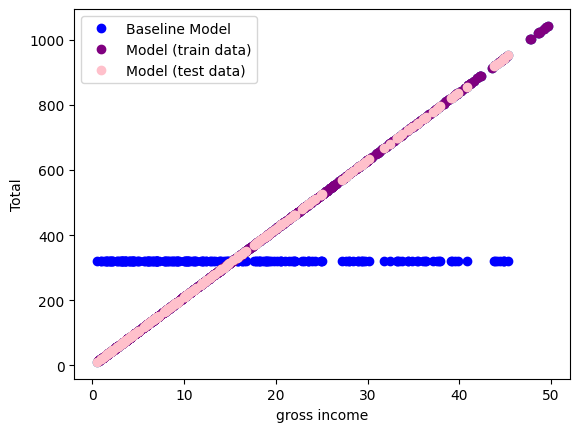

In [49]:
# visualising the baseline, model (train data & test data) on a scatterplot

plt.plot(X_test.values, baseline_pred, "bo", color="blue", label="Baseline Model")
plt.plot(X_train.values, model_train_pred, "bo", color="purple", label="Model (train data)")
plt.plot(X_test.values, model_test_pred, "bo", color="pink", label="Model (test data)")
plt.scatter(X, y)
plt.xlabel("gross income")
plt.ylabel("Total")
plt.legend()

Compare Baseline MAE, Model testing MAE and Model training MAE

In [50]:
# print baseline model (train) and model (test) MAEs to compare the three of them

print("The baseline MAE is:\t\t", round(baseline_mae, 2))
print("The model (train) MAE is:\t", round(model_train_mae, 2))
print("The model (test) MAE is:\t", round(model_test_mae, 2))

The baseline MAE is:		 209.77
The model (train) MAE is:	 0.0
The model (test) MAE is:	 0.0


Report Model Performance

#***Model Deployment***

In [51]:
#saving the model using pickle
with open("model.pkl", "wb") as f:
  pickle.dump(model, f)

In [52]:
# check if model.pkl was created

!ls

 drive	 model.pkl   sample_data  'supermarket_sales - Sheet1.csv'


In [53]:
# saving model.pkl to computer drive

files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Save file containing Streamlit code to local drive

In [59]:
# streamlit code

%%writefile app.py

import pickle
import streamlit as st
import pandas as pd

# loading the file with the (model.pkl)
with open("model.pkl", "rb") as f:
  model = pickle.load(f)

# Streamlit app page title
st.title("Gross Income Predictor")

# inputing widget for getting user value for X (feature matrix value)
price = st.slider("Total", min_value=0, max_value=100, value=20)

# After selesting gross, the user then submits the gross value
if st.button("Predict"):
  # take the price value, and format the value the right way
  prediction = model.predict([[gross Income]])[0].round(2)
  st.write("The predicted gross income is", prediction, "pounce")

Overwriting app.py


In [60]:
# checking if app.py has been created on google drive

!ls

 app.py   drive   model.pkl   requirements.txt	 sample_data  'supermarket_sales - Sheet1.csv'


In [61]:
# download app.py to local directory

files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#***Requirements file***

In [62]:
# creating the requirements.txt file

%%writefile requirements.txt
pickle4
streamlit
pandas
scikit-learn

Overwriting requirements.txt


In [63]:
# download the requirements.txt

files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>